In [49]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [117]:
def flux ( rho, vmax, rho_max ):
    f = rho * vmax * (1 - rho/rho_max)
    return f

def ic ( rho_left, x_left, x) :
    rho0 = numpy.zeros (numpy.shape(x)[0])
    mask = numpy.where ( (x>=0.0) & (x<2.0))
    rho0 [mask] = rho_left * x[mask] / 2.0
    return rho0

def ftbs ( rh0, rhomax, nt, dx,  sigma, vmax  ):
    rho = rho0.copy()
    rho_hist = [rho0.copy()]
    dt = sigma * dx * vmax
    for i in range(nt):
        rhon = rho.copy()
        rho [1:] =  ( dt* ( - flux ( rhon[1:], vmax, rhomax ) + flux ( rhon [:-1], vmax, rhomax  ) ) / dx ) + rhon [ 1:]
        rho_hist.append ( rho )
    return rho, rho_hist

In [191]:
nx = 81.0
nt = 30
vmax = 1
rhomax = 10.0
sigma = 1
L = 4.0
dx = L / (nx - 1)
rho_l = 4

In [192]:
xgrid = numpy.linspace ( 0.0, L, nx )
rho0 = ic ( rho_l, 2.0, xgrid)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [193]:
rhof, rho_hist = ftbs (rho0, rhomax, nt, dx,  sigma, vmax )

In [194]:
def plot ( n, x, rho_hist) :
    pyplot.rcParams['font.family'] = 'serif'
    pyplot.rcParams['font.size'] = 16
    pyplot.figure ( figsize = (10, 5))
    pyplot.title('Time step: {}'.format(n))
    pyplot.plot(xgrid, rho_hist[0], label = 'Initial')
    pyplot.plot ( xgrid, rho_hist[n], label = ' Current ' )
    pyplot.legend (loc = 'best')
    pyplot.xlabel ( '$x$') ;  pyplot.ylabel ( ' Density ') ; 
    pyplot.xlim ( 0.0, L ); pyplot.ylim (0.0) ; 
    pyplot.show()

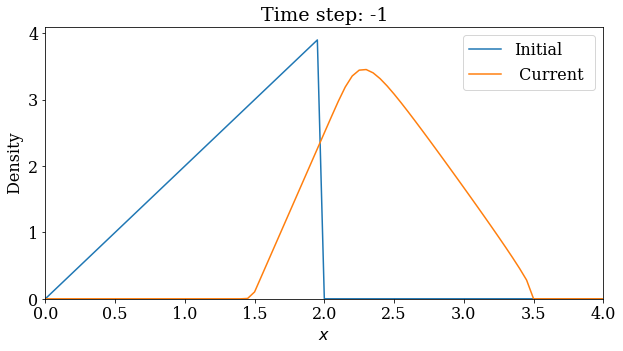

In [195]:
fig = plot(-1, xgrid, rho_hist)

In [196]:
import ipywidgets

In [197]:
def interactive_plot (x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider (value=0, min = 0, max = nt, step =1, description = 'Time step')
    w = ipywidgets.interactive ( plot, n = nt_slider, x = ipywidgets.fixed(xgrid), rho_hist = ipywidgets.fixed(rho_hist))
    return w

In [198]:
interactive_plot(xgrid, rho_hist)

interactive(children=(IntSlider(value=0, description='Time step', max=30), Output()), _dom_classes=('widget-in…

In [181]:
def update_plot( n, rho_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    line1.set_ydata(rho_hist[n])


In [182]:
from matplotlib import animation
from IPython.display import HTML

# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
# Display the video.
HTML(anim.to_html5_video())

AttributeError: 'NoneType' object has no attribute 'canvas'

In [199]:
len(rho_hist)

31